In [1]:

# -*- coding:utf-8 -*-
# 网易云音乐 通过歌手ID，生成该歌手的词云
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree
 
headers = {
       'Referer'  :'http://music.163.com',
       'Host'     :'music.163.com',
       'Accept'   :'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
       'User-Agent':'Chrome/10'
    }

ModuleNotFoundError: No module named 'jieba'

In [27]:
# 得到某一首歌的歌词
def get_song_lyric(headers,lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
       lyric = res.json()['lrc']['lyric']
       new_lyric = re.sub(r'[\d:.[\]]','',lyric)
       return new_lyric
    else:
       return ''
       print(res.json())

In [28]:
# 去掉停用词
def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
    for stop_word in stop_words:
       f = f.replace(stop_word, '')
    return f

In [29]:
# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
    wc = WordCloud(
       font_path="./wc.ttf",
       max_words=100,
       width=2000,
       height=1200,
    )
    print(cut_text)
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [30]:
# 得到指定歌手页面 热门前50的歌曲ID，歌曲名
def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id
    # 获取网页HTML
    res = requests.request('GET', page_url, headers=headers)
    # 用XPath解析 前50首热门歌曲
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)
    # 设置热门歌曲的ID，歌曲名称
    song_ids = []
    song_names = []
    for href, name in zip(hrefs, names):
       song_ids.append(href[9:])
       song_names.append(name)
       print(href, '  ', name)
    return song_ids, song_names

/song?id=569214250    借
/song?id=569213220    像我这样的人
/song?id=569200213    消愁
/song?id=536099160    不染
/song?id=569200212    一荤一素
/song?id=569214247    平凡的一天
/song?id=569200210    给你给我
/song?id=569212211    盛夏
/song?id=1417862046    呓语
/song?id=1407214788    二零三
/song?id=1440876696    深夜一角 (Live)
/song?id=525278524    无问
/song?id=1417849873    一程山路
/song?id=1411558182    东北民谣
/song?id=1417856017    小王
/song?id=1417862065    小王日记
/song?id=1421191830    借 (Live)
/song?id=569214252    如果有一天我变得很有钱
/song?id=569212210    想你想你
/song?id=1383923446    17
/song?id=1408763442    水乡
/song?id=1413304559    胡同
/song?id=1417849885    等
/song?id=569200211    哎哟
/song?id=569214249    南一道街
/song?id=1417723811    红莓花儿开
/song?id=524913480    感觉自己是巨星
/song?id=518088247    项羽虞姬
/song?id=569214251    芬芳一生
/song?id=1313052960    从无到有
/song?id=862098671    意料之中
/song?id=1306496991    一江水
/song?id=1325897605    那时的我们
/song?id=519250015    请记住我
/song?id=1332490992    在无风时
/song?id=1417849899    Outro
/song?id=52

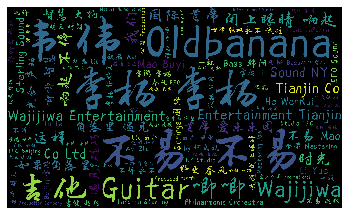

In [31]:
# 设置歌手ID，毛不易为12138269
artist_id = '12138269'
[song_ids, song_names] = get_songs(artist_id)
# 所有歌词
all_word = ''
# 获取每首歌歌词
for (song_id, song_name) in zip(song_ids, song_names):
    # 歌词API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
    print(song_name)
#根据词频 生成词云
create_word_cloud(all_word) 